## Weekly 2 Mission - Finding out significant variables that affect a Machine Learning model by using EDA

* Finding out which feature affects a customer's churn through EDA
* Enhancing the performance of ML model by adjusing features
* EDA can be helpful for finding out data structure, patterns, outliers, and relationships between variables. it can enable to understand the overall data before ML modeling. As detecting significant variables that affect a customer's churn, we can choose more effective features. As eliminating unnecessary or inappropriate features, we can prevent a model from becoming suboptimal. EDA processes are important for decreasing the complextity of a model or enhancing the performance.   

* Dataset Introduction
    * This Kaggle dataset ( https://www.kaggle.com/blastchar/telco-customer-churn ) contains information regarding churn of customers. The dataset can be used for predicting necessary actions to retain customers based on data analysis. 
    * Elements of the dataset.
        * Demographi infor: Gender, SeniorCitizen, Partner, dependents
        * Churn: whether a customer canceled a subscription
        * Services subcribed: It contains subscription information regarding  honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
        * Customer account infor: CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the dataset
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
# TotalCharges is not a numeric type. We need to convert it to a numeric one for arithmetic calculation. 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## Mission 1 - Data visualization and analysis of all the numerical variables with regards to churn
Visualize and analyze all the numerical features with regards to churn. 

In [24]:
# Contain all the features in a list
feature_columns = df.columns[0:].tolist()
feature_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [25]:
# Pick out only numeric features in a seperate list.
cols = [feature_columns[1],feature_columns[4],feature_columns[17],feature_columns[18]]
cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
# Split the dataset based on two categories of the target variable, churn. 
df_0 = df[df["Churn"] == "No"]
df_1 = df[df["Churn"] == "Yes"]
df_0.shape, df_1.shape

((5174, 20), (1869, 20))

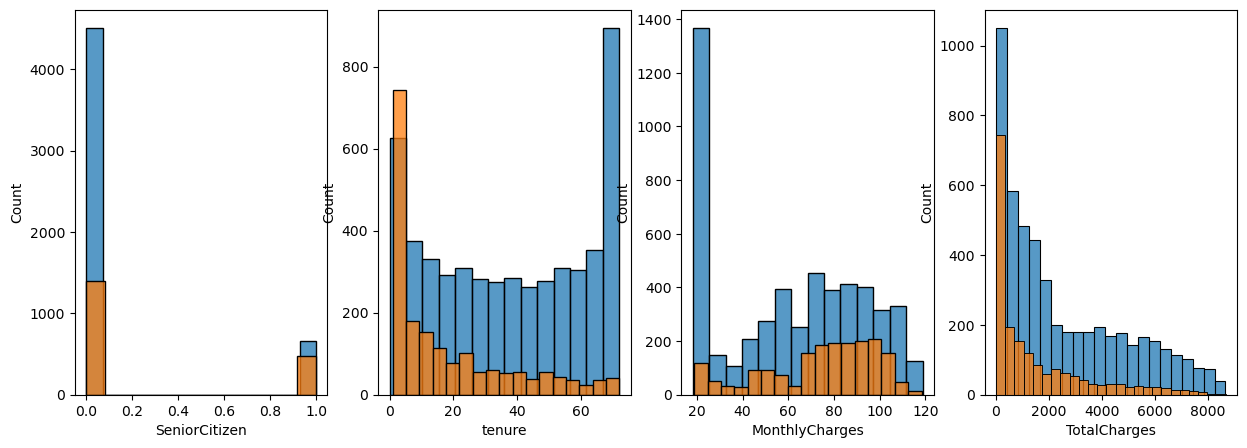

In [27]:
# Make histplots for 4 selected features. The data visualization should be conducted by using seperate categories.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

for i, col_name in enumerate(cols):
  col = i
  sns.histplot(df_0[col_name], ax=axes[col])
  sns.histplot(df_1[col_name], ax=axes[col])

## Mission 2 = Analyzing the effect of categorical features on the target variable. 

* Understanding how categorical features affect the target variable can help us determine the significance of corresponding features. These can be important indicators for feature selection in business-related decision-making, data strategy, and modeling. If a categorical variable has a strong correlation with the target variable, it suggests that the feature should be important for enhancing the accuracy of the model. It also contributes to identifying eccentric patterns or outliers through data analysis between categorical features and the target variable.
* Visualize the categorical features with the target variable and come up wiht insights from the analysis on the visualization.

In [28]:
# Check out the number of categories for each feature. 
# Categorical features normally contains less than five categories.
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [29]:
# Choose eight features from them for data visualization.
category_col_name = category_col.index.tolist()
category_col_name_visual = category_col_name[:4]+category_col_name[5:9]
category_col_name_visual

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup']

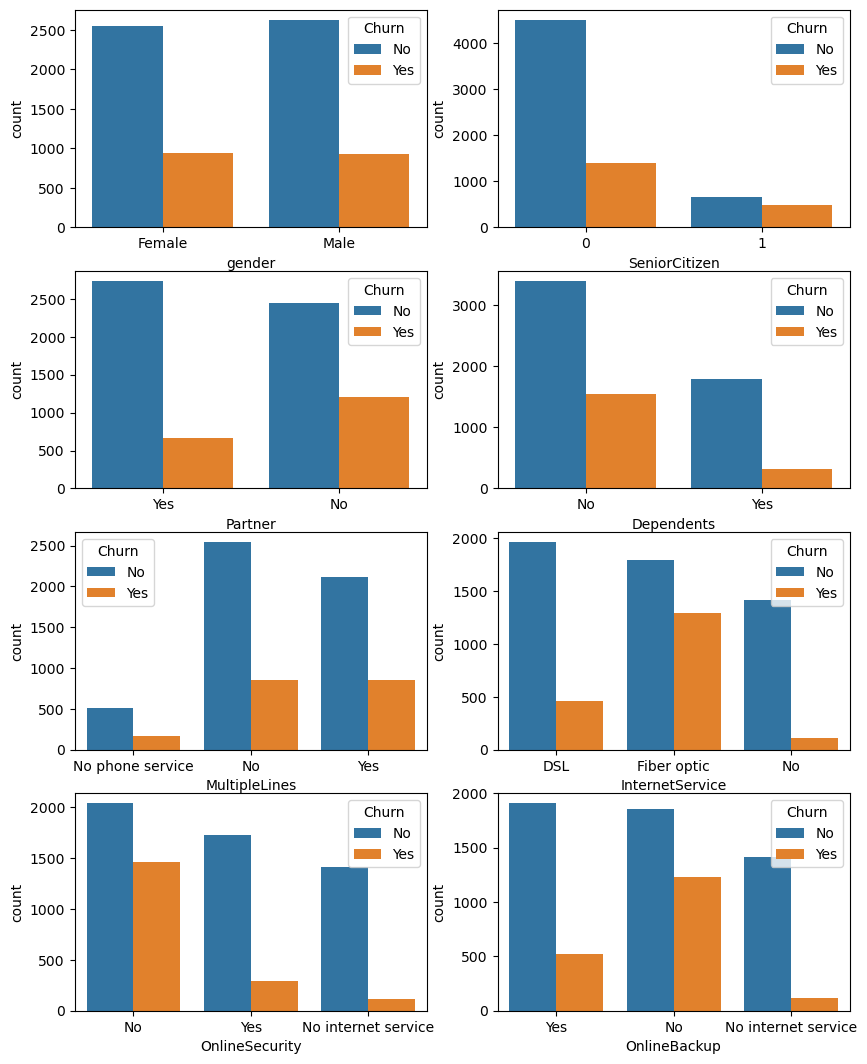

In [30]:
# Make subplots and then put the above features in those.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,13))

for i, col_name in enumerate(category_col_name_visual):
  row = i // 2
  col = i % 2
  sns.countplot(data=df, x=col_name, hue="Churn", ax=axes[row][col])

## Mission 3 - Making plots and finding correlation coefficients for figuring out the relationship between numerical features. 



Correlation coefficients can help us understand the linear relationship between variables. Detecting a high correlation coefficient between variables can contribute to optimizing the performance of a model by eliminating redundant features. It can also help us prevent the issue of multicollinearity. We can create a correlation matrix to better understand the data patterns or characteristics. We can then move on to the next step, feature engineering.

[example]

|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [34]:
# Correlation
df_numeric = df.select_dtypes(include=[np.number])
df_corr = df_numeric.corr()
df_corr.style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

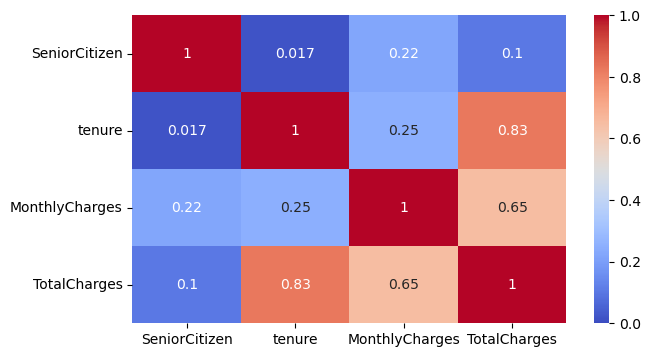

In [35]:
# Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=0, cmap="coolwarm")
# We can notice high correlation coefficients between TotalCharges and tenure, 
# as well as between TotalCharges and MonthlyCharges.

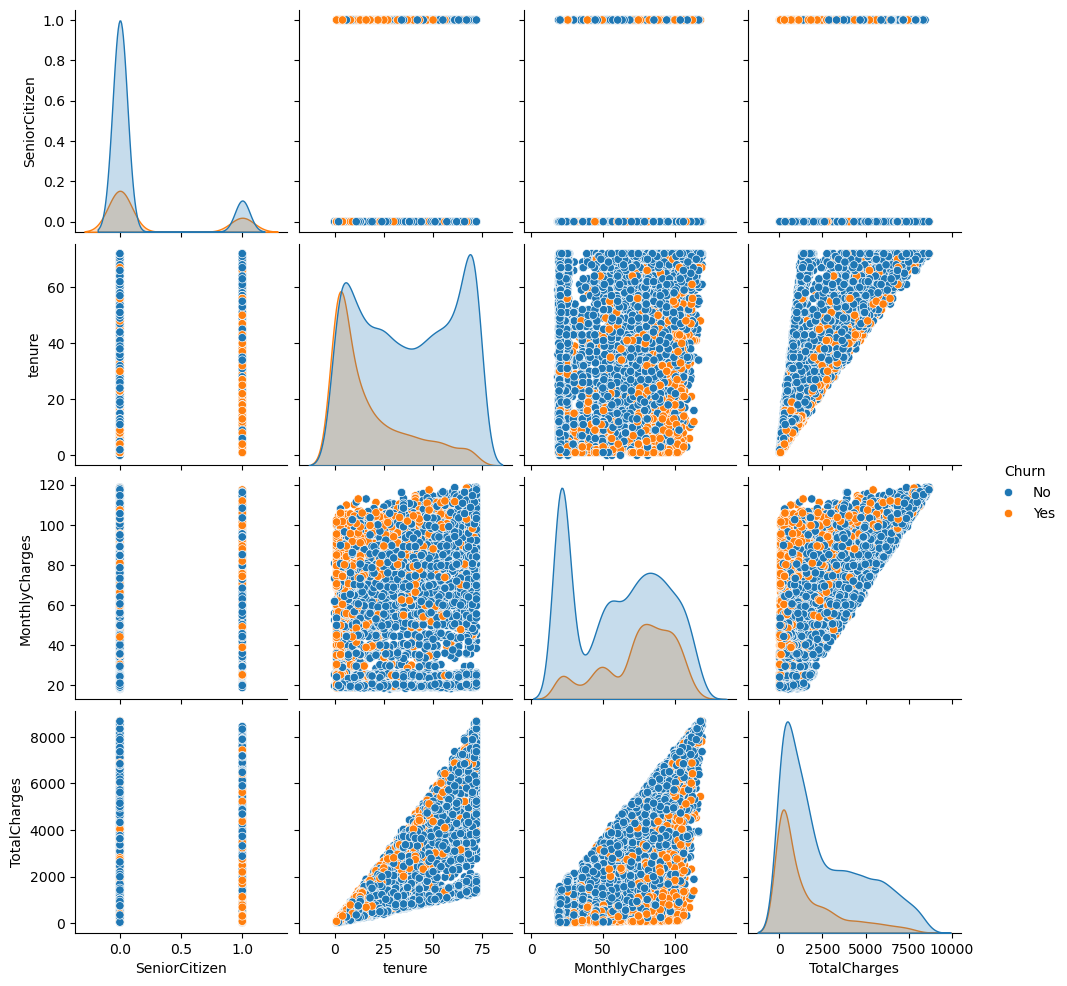

In [36]:
# Visualize Churn using the pairplot from seasborn according to the departure status.
sns.pairplot(df, hue="Churn")
# We can observe an upward trend between TotalCharges and tenure,
# as well as between TotalCharges and MonthlyCharges.